# Installing the OpenAI python package

In [ ]:
!pip install openai

# Examples of how to use the OpenAI API to generate text based on a given prompt and a set of parameters.

We will be using the OpenAI API to generate text using the GPT-3 language model named "text-davinci-003". The specific text that will be generated is based on the given prompt. 

The API will return a response that contains the generated text based on the provided parameters:

temperature: parameter controls the randomness and creativity of the generated text. A lower temperature value will result in more conservative and predictable responses, while a higher value will produce more diverse and unexpected responses.

max_tokens: parameter specifies the maximum length of the generated text in terms of number of tokens (words or symbols).

top_p: parameter controls the diversity of the generated text by limiting the pool of possible next words to those with a cumulative probability up to the given value.

frequency_penalty and presence_penalty: parameters are used to discourage repetition of certain words or phrases in the generated text.


## Example1: text translation use cases

In [17]:
import os
import openai
from pprint import pprint

#generated key from OpenAI accout
openai.api_key = os.getenv("OPENAI_API_KEY")

# Call the OpenAI API to generate text using the specified parameters

#openai.Completion.create() method generates text using the GPT-3 language model specified in the model parameter.
# The initial text prompt is specified in the prompt parameter, and the various parameters control the randomness, 
# length, and diversity of the generated text. Once the API call is complete, the generated text is stored in the response variable.
response = openai.Completion.create(
  model="text-davinci-003",  # The name of the GPT-3 language model to use
  prompt="Translate hello my name is Betha to french ",  # The initial text prompt to generate text from
  temperature=0.3,  # Controls the randomness and creativity of the generated text
  max_tokens=60,  # The maximum length of the generated text in terms of tokens (words or symbols)
  top_p=1.0,  # Controls the diversity of the generated text by limiting the pool of possible next words
  frequency_penalty=0.0,  # Discourages the repetition of certain words or phrases in the generated text
  presence_penalty=0.0  # Discourages the presence of certain words or phrases in the generated text
)

In [11]:
response

<OpenAIObject text_completion id=cmpl-72LF7s6niMrgiNZ9KikFPBDqiSFi3 at 0x7fbcc979d0e0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nBonjour, je m'appelle Betha."
    }
  ],
  "created": 1680792669,
  "id": "cmpl-72LF7s6niMrgiNZ9KikFPBDqiSFi3",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 14,
    "prompt_tokens": 11,
    "total_tokens": 25
  }
}

## example2: entities extraction from complaint

In [18]:
from pprint import pprint

pprint(openai.Completion.create(
  model="text-davinci-003",  # The name of the GPT-3 language model to use
  prompt="""extract the entities and labels from the text and return them as a dictionary entity:label: 
  There are some annoying things with my Tesla Model 3 interface.
   For example, the current UI has the windshield wiper controls in a funky place that's sort of hard to navigate to while you're driving, 
   unless you press the "Mist" button on the stalk which brings up a card with the controls on it - then you can access them easily. 
   Or you can use voice commands, which generally work quite well. So I sort of agree that the major mechanical components like headlights and wipers should probably 
   have some very easy permanent buttons right on the home screen - but there are a few work arounds that are adequate. 
   I disagree completely with the author's complaints about the navigation system, it's very easy to use and there is a box where you're clearly able to touch to input an address. 
   Voice commands for navigation also work fairly well. """,  # The initial text prompt to generate text from
  temperature=0.8,  # Controls the randomness and creativity of the generated text
  max_tokens=100,  # The maximum length of the generated text in terms of tokens (words or symbols)
  top_p=1.0,  # Controls the diversity of the generated text by limiting the pool of possible next words
  frequency_penalty=0.0,  # Discourages the repetition of certain words or phrases in the generated text
  presence_penalty=0.0  # Discourages the presence of certain words or phrases in the generated text
))

{'choices': [{'finish_reason': 'stop',
              'index': 0,
              'logprobs': None,
              'text': '\n'
                      '\n'
                      'Tesla Model 3: Vehicle\n'
                      'Windshield Wiper Controls: Feature \n'
                      'UI: Interface\n'
                      '"Mist" Button: Feature \n'
                      'Home Screen: Interface \n'
                      'Headlights: Feature \n'
                      'Work Arounds: Solution \n'
                      'Navigation System: Feature \n'
                      'Voice Commands: Solution \n'
                      'Input Address: Action'}],
 'created': 1680793930,
 'id': 'cmpl-72LZSflloyqVqZU6eQQ5q6KrTqbUn',
 'model': 'text-davinci-003',
 'object': 'text_completion',
 'usage': {'completion_tokens': 65,
           'prompt_tokens': 209,
           'total_tokens': 274}}


## Example 3: providing table and a request

In this example we Are showing the capability of the model to understand tables however it is not advised to use it in the prompt as for bigger tables will have large numbers of token that may aceed your qota or may acceed the max token the model can accept

In [47]:
table = """
+----------------+---------------+------------+---------------+--------------+-------------+-----+----------------+----------+
| account_number | account_type  | balance    | interest_rate | date_opened  | citizenship | age | name           | gender   |
+----------------+---------------+------------+---------------+--------------+-------------+-----+----------------+----------+
| 1001           | checking      | 2500.00    | 0.01          | 2022-01-01   | USA         | 35  | John Smith     | male     |
| 1002           | savings       | 5000.00    | 0.03          | 2021-05-15   | Canada      | 28  | Emily Johnson  | female   |
| 1003           | checking      | 10000.00   | 0.01          | 2020-12-10   | Mexico      | 42  | Juan Hernandez | male     |
| 1004           | investment    | 150000.00  | 0.08          | 2019-02-28   | France      | 58  | Marie Dupont   | female   |
| 1005           | savings       | 7500.00    | 0.05          | 2022-03-21   | USA         | 47  | Michael Lee    | male     |
| 1006           | checking      | 3000.00    | 0.01          | 2021-09-01   | Germany     | 30  | Sophie Schmidt | female   |
| 1007           | savings       | 10000.00   | 0.03          | 2020-07-03   | Mexico      | 25  | Luis Rodriguez | male     |
| 1008           | investment    | 50000.00   | 0.07          | 2018-11-20   | Canada      | 61  | Anne Tremblay  | female   |
| 1009           | checking      | 2000.00    | 0.01          | 2022-02-15   | USA         | 39  | David Kim      | male     |
| 1010           | savings       | 15000.00   | 0.04          | 2021-10-30   | Canada      | 43  | Maria Gonzalez | non-binary |
+----------------+---------------+------------+---------------+--------------+-------------+-----+----------------+----------+

"""

In [48]:
prompt = """ 
get the name and citizenship and balance of 3 individual who have the highest balance  """

In [42]:
sorted(set([2500,5000, 10000, 150000, 7500, 3000, 10000, 50000, 2000, 15000]))

[2000, 2500, 3000, 5000, 7500, 10000, 15000, 50000, 150000]

In [44]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=table+prompt,
  temperature=0.0,
  max_tokens=100,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)

pprint(response)

{'choices': [{'finish_reason': 'stop',
              'index': 0,
              'logprobs': None,
              'text': '\n'
                      '\n'
                      '+----------------+-------------+------------+\n'
                      '| name           | citizenship | balance    |\n'
                      '+----------------+-------------+------------+\n'
                      '| Marie Dupont   | France      | 150000.00  |\n'
                      '| Anne Tremblay  | Canada      | 50000.00   |\n'
                      '| Emily Johnson  | Canada      | 5000.00    |\n'
                      '+----------------+-------------+------------+'}],
 'created': 1680878007,
 'id': 'cmpl-72hRXyfCfIHGqScCzpk02c1Jf70cW',
 'model': 'text-davinci-003',
 'object': 'text_completion',
 'usage': {'completion_tokens': 82,
           'prompt_tokens': 506,
           'total_tokens': 588}}


**thats why we recommend using the following approach:**


1.   we describe the schema by specifying the name of the table and the context that it is a MySql Table.
2.   we write the query and indicate what would be the first word


In [10]:
c = """ MySQL accounts table schema:
  account_number INT NOT NULL,
  account_type ENUM('checking', 'savings', 'investment') NOT NULL,
  balance DECIMAL(10, 2) NOT NULL,
  interest_rate DECIMAL(4, 2),
  date_opened DATE NOT NULL,
  citizenship VARCHAR(50),
  age INT,
  name VARCHAR(50),
  gender ENUM('male', 'female', 'non-binary'),
  PRIMARY KEY (account_number)
  """
request = """write query to get the name and citizenship and balance of 3 individual who have the highest balance select""" 

In [14]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt =table_accounts_schema + request,
  temperature=0.3,
  max_tokens=60,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)


pprint("select" + response["choices"][0]["text"])

'select name, citizenship, balance from accounts order by balance desc limit 3;'


## Example 4: Generating code based on natural language  prompt

In [54]:


# Call the OpenAI API to generate text using the specified parameters

#openai.Completion.create() method generates text using the GPT-3 language model specified in the model parameter.
# The initial text prompt is specified in the prompt parameter, and the various parameters control the randomness, 
# length, and diversity of the generated text. Once the API call is complete, the generated text is stored in the response variable.
response = openai.Completion.create(
  model="text-davinci-003",  # The name of the GPT-3 language model to use
  prompt="create python script for training Neural network based with comments",  # The initial text prompt to generate text from
  temperature=0.1,  # Controls the randomness and creativity of the generated text
  max_tokens=4000,  # The maximum length of the generated text in terms of tokens (words or symbols)
  top_p=1.0,  # Controls the diversity of the generated text by limiting the pool of possible next words
  frequency_penalty=0.0,  # Discourages the repetition of certain words or phrases in the generated text
  presence_penalty=0.0  # Discourages the presence of certain words or phrases in the generated text
)

pprint(response["choices"][0]["text"])


('\n'
 '\n'
 '#importing necessary libraries\n'
 'import numpy as np\n'
 'import pandas as pd\n'
 'from keras.models import Sequential\n'
 'from keras.layers import Dense\n'
 '\n'
 '#loading the dataset\n'
 "dataset = pd.read_csv('dataset.csv')\n"
 '\n'
 '#splitting the dataset into input and output\n'
 'X = dataset.iloc[:, :-1].values\n'
 'y = dataset.iloc[:, -1].values\n'
 '\n'
 '#splitting the dataset into training and testing\n'
 'from sklearn.model_selection import train_test_split\n'
 'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, '
 'random_state = 0)\n'
 '\n'
 '#building the neural network\n'
 'model = Sequential()\n'
 "model.add(Dense(units = 8, activation = 'relu', input_dim = "
 'X_train.shape[1]))\n'
 "model.add(Dense(units = 4, activation = 'relu'))\n"
 "model.add(Dense(units = 1, activation = 'sigmoid'))\n"
 '\n'
 '#compiling the model\n'
 "model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = "
 "['accuracy'])\n"
 '\n'
 '#

# Example how to use Chat models take a series of messages as input, and return a model-generated message as output.



Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversations (such as those previously served by instruction following models like text-davinci-003).
The main input is the messages parameter. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content (the content of the message). Conversations can be as short as 1 message or fill many pages.

Typically, a conversation is formatted with a system message first, followed by alternating user and assistant messages.

The system message helps set the behavior of the assistant. In the example above, the assistant was instructed with "You are a helpful assistant."

In [56]:
#example from: https://platform.openai.com/docs/guides/chat/introduction

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Who won the world series in 2020?"},
        {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
        {"role": "user", "content": "Where was it played?"}
    ]
)

<OpenAIObject chat.completion id=chatcmpl-72i1fMriVma1oyfkh4RJDgcBybttV at 0x7f1d0846bf40> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "The entire 2020 Major League Baseball (MLB) postseason, including the World Series, was played at a neutral site in Arlington, Texas, at the home stadium of the Texas Rangers.",
        "role": "assistant"
      }
    }
  ],
  "created": 1680880247,
  "id": "chatcmpl-72i1fMriVma1oyfkh4RJDgcBybttV",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 39,
    "prompt_tokens": 57,
    "total_tokens": 96
  }
}

# Example how to use the OpenAI API to generate Images based on a given prompt.

We will be  the OpenAI API to generate an image based on a prompt, specified in the prompt parameter of the openai.Image.create() function. The API is called with the specified n, size, and response_format parameters.


The response variable stores the JSON response from the API, which is a list of dictionaries that contains information about the generated images, including the base64-encoded image data.


The base64 module is used to decode the base64-encoded image data and store it in the image_data variable.


Finally, the HTML function is used to display the decoded image data as an image in an IPython notebook.

In [ ]:
# Set your OpenAI API key
#openai.api_key = "API KEY" #we did it earlier

# Call the OpenAI API to generate an image
response = openai.Image.create(
    prompt="high resolution photograph from far away of a camel in Warsaw near palace of culture",  # Prompt description of the image you want to get
    n=4,  # Number of images to generate
    size="1024x1024",  # Desired size of the image
    response_format="b64_json"  # Response format: base64-encoded JSON
)

# Decode the base64-encoded JSON response and extract the image data
image_data = base64.b64decode(response["data"][0]["base64"])

# Display the image in an IPython notebook
HTML('<img src="data:image/jpeg;base64,{}">'.format(base64.b64encode(image_data).decode()))


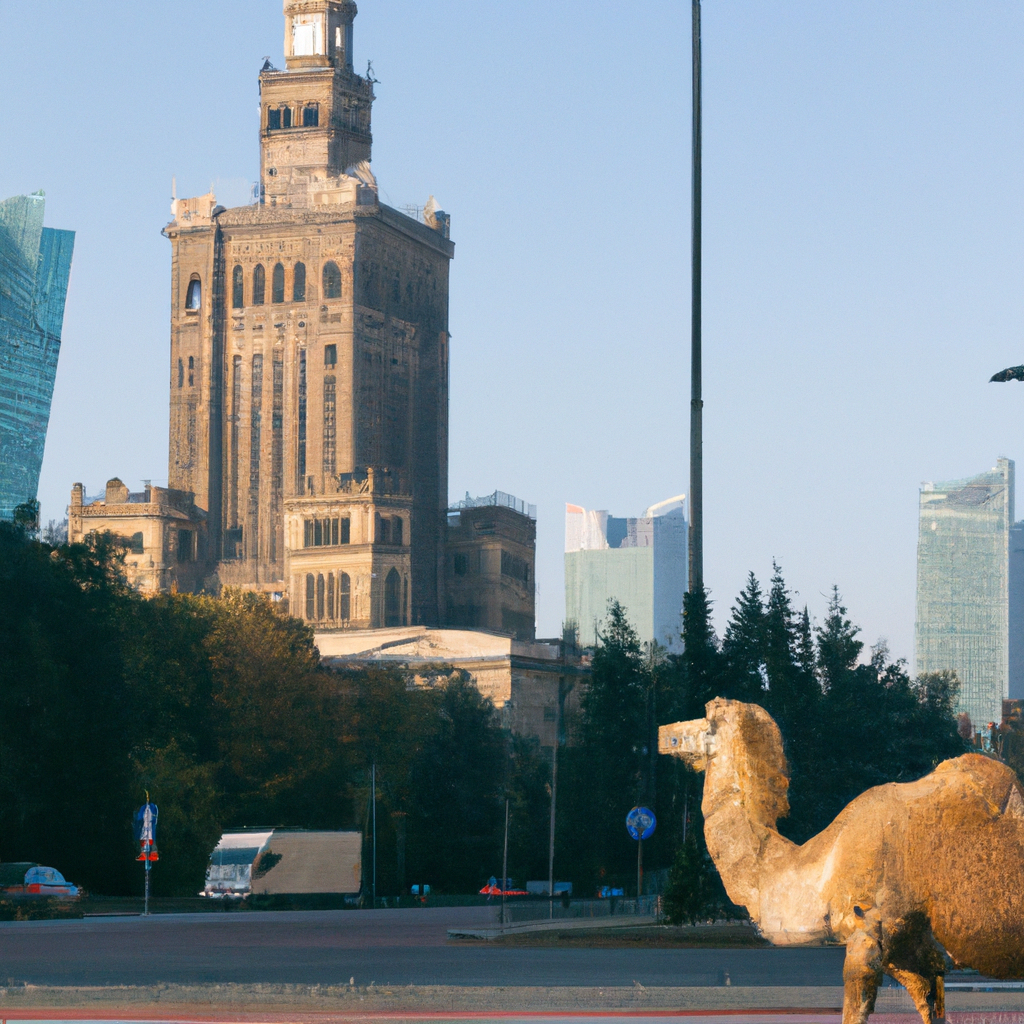

In [83]:
# Decode the base64-encoded JSON response and extract the image data
image_url = response['data'][3]["b64_json"]
# Display the image using the HTML image tag in IPython notebook
HTML('<img src="data:image/png;base64,' + image_url + '">')